In [18]:
!pip install diffusers transformers fastcore fastdownload


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [14]:
from PIL import Image
from fastcore.all import concat
import torch, logging
from pathlib import Path
from huggingface_hub import notebook_login
from PIL import Image
import matplotlib.pyplot as plt
logging.disable(logging.WARNING)
torch.manual_seed(1)

def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

def image_grid_flip(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs):
        row = i % rows
        col = (int)((i - row) / rows)
        grid.paste(img, box=(w*col, h*row))
    return grid

def image_resize(grid, factor=3): 
    return grid.resize(((int)(grid.size[0]/factor), (int)(grid.size[1]/factor)))

In [15]:
if not (Path.home()/'.huggingface'/'token').exists(): notebook_login()

## Hello World

In [19]:
from diffusers import StableDiffusionImg2ImgPipeline

pipei2i = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16,
).to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

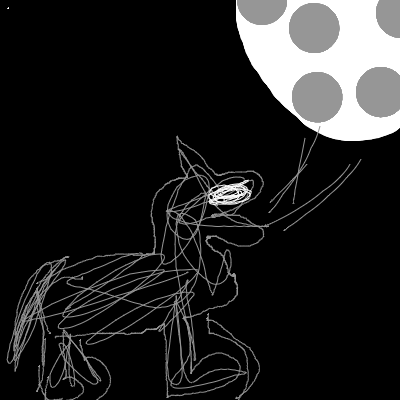

In [20]:
from fastdownload import FastDownload
p = FastDownload().download('https://s3.amazonaws.com/moonup/production/uploads/1664665907257-noauth.png')
init_image = Image.open(p).convert("RGB")
init_image

In [33]:
torch.manual_seed(1000)
prompt = "Wolf howling at the moon, photorealistic 4K"
images = pipei2i(prompt=prompt, num_images_per_prompt=3, init_image=init_image, strength=0.8, num_inference_steps=50).images

  0%|          | 0/41 [00:00<?, ?it/s]

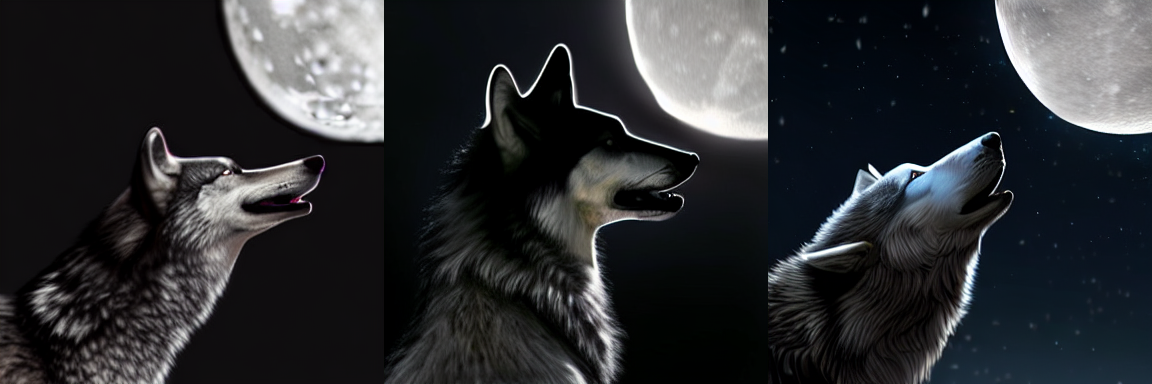

In [41]:
image_grid(images, 1, 3)

  0%|          | 0/70 [00:00<?, ?it/s]

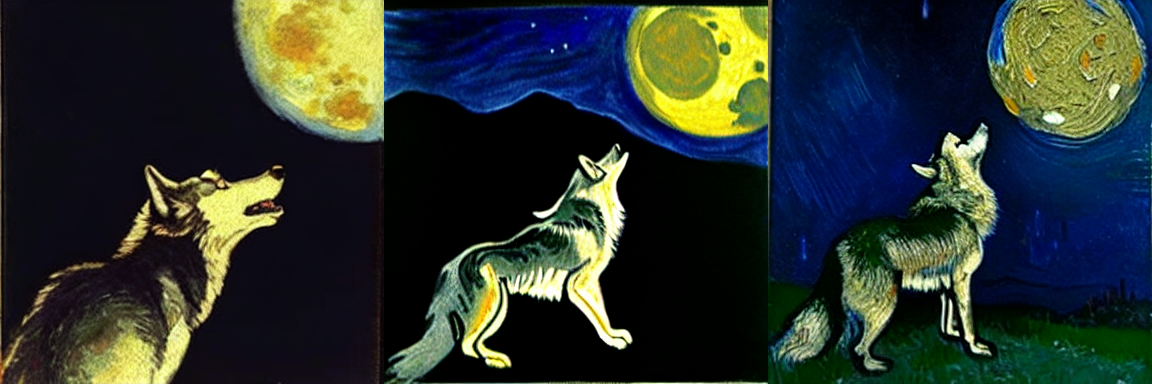

In [42]:
torch.manual_seed(1000)
prompt = "Oil painting of wolf howling at the moon by Van Gogh"
images = pipei2i(prompt=prompt, num_images_per_prompt=3, init_image=init_image, strength=1, num_inference_steps=70).images
image_grid(images, rows=1, cols=3)